In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('images/sudoku.tif')
img = cv2.resize(img,(0,0),fx=0.4,fy=0.4)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)

rows, cols = img.shape

In [3]:
def search_for_top_left_pixel():
    for i in range(rows):
        for j in range(cols):
            if img[i, j] != 255:
                return i, j

In [4]:
def search_for_bottom_right_pixel():
    for i in range(rows-1, 0, -1):
        for j in range(cols-1, 0, -1):
            if img[i, j] != 255:
                return i, j  

In [5]:
x1, y1= search_for_top_left_pixel()
x2, y2= search_for_bottom_right_pixel()

img_sudoku = img[x1:x2, y1:y2]

width, height = img_sudoku.shape

In [6]:
cell_width = width // 9
cell_height = height // 9

def count_none_white_pixels(img):
    rows, cols = img.shape
    dah_darsad_rows = rows // 10
    dah_darsad_cols = cols // 10
    counter = 0
    for i in range(dah_darsad_rows, rows-dah_darsad_rows):
        for j in range(dah_darsad_cols, cols-dah_darsad_cols):
            if img[i, j] != 255:
                counter += 1
    
    return counter

In [7]:
counter = 0

a = (cell_width * cell_height) / 35

for i in range(0, width, cell_width):
    for j in range(0, height, cell_height):
        small_img = img_sudoku[i:i+cell_width, j:j+cell_height]
        if small_img.shape == (cell_width, cell_height):
            if count_none_white_pixels(small_img) > a:
                cv2.imwrite(f'cells/{counter}.jpg', small_img)
                counter += 1

-1

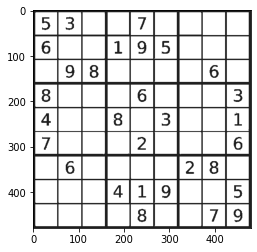

In [8]:
plt.imshow(img_sudoku, cmap='gray')
cv2.waitKey()